In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)


In [2]:
import tensorflow
import keras

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.utils import img_to_array, load_img

In [5]:
(os.listdir("C:\\Users\\Welcome\\dataset\\New Plant Diseases Dataset(Augmented)\\train"))

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [6]:
#using preprocessing model for train our dataset
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [7]:
train_set = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)

In [8]:
valid_dataset = ImageDataGenerator(preprocessing_function = preprocess_input)

In [9]:
train = train_set.flow_from_directory(directory = "C:\\Users\\Welcome\\dataset\\New Plant Diseases Dataset(Augmented)\\train", target_size = (256, 256), batch_size = 32 )

valid = valid_dataset.flow_from_directory(directory = "C:\\Users\\Welcome\\dataset\\New Plant Diseases Dataset(Augmented)\\valid", target_size = (256, 256), batch_size = 32 )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
train_img, label = train.next()

In [11]:
train_img.shape

(32, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


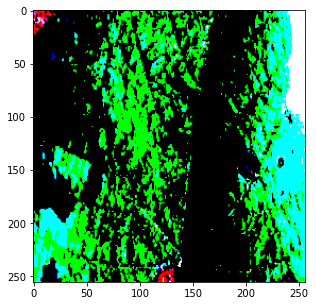

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


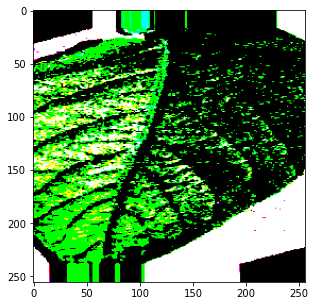

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


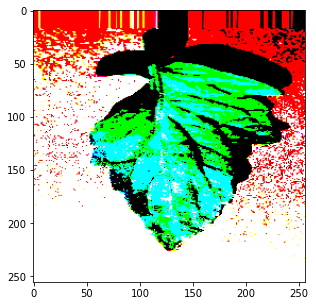

In [12]:
#preprocessing image
def printImg(train_img, label):
    for im, l in zip(train_img, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()
printImg(train_img[:3], label[:3])

In [13]:
#Building  a model

In [42]:
!pip install keras.layers

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [1]:
!pip install keras.model

ERROR: Could not find a version that satisfies the requirement keras.model (from versions: none)
ERROR: No matching distribution found for keras.model


In [15]:
from keras.layers import Dense, Flatten

In [16]:
from keras.models import Model

In [17]:
model = VGG19(input_shape = (256,256,3), include_top = False)

80134624/80134624 [==============================] - 14s 0us/step


In [19]:
for layer in model.layers:
    layer.trainable = False

In [20]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
x = Flatten()(model.output)

In [22]:
x = Dense(units = 38, activation = 'softmax')(x)

In [23]:
ori_model = Model(model.input, x)

In [24]:
ori_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [40]:
ori_model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [42]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01, patience=3, verbose = 1)

In [43]:
model_checkpoint = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy',min_delta = 0.01, patience=3, verbose = 1, save_best_only = True)

In [44]:
cb = [early_stopping, model_checkpoint]

In [45]:
tensorflow.config.experimental.list_physical_devices('GPU')
his = ori_model.fit(train, steps_per_epoch = 16, epochs = 50, verbose = 1, callbacks= cb, validation_data = valid, validation_steps = 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 28.3229 - accuracy: 0.1758 
Epoch 1: val_accuracy improved from -inf to 0.42188, saving model to best_model.h5
16/16 [==============================] - 476s 30s/step - loss: 28.3229 - accuracy: 0.1758 - val_loss: 13.3419 - val_accuracy: 0.4219
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 17.5514 - accuracy: 0.3828 
Epoch 2: val_accuracy improved from 0.42188 to 0.60742, saving model to best_model.h5
16/16 [==============================] - 498s 32s/step - loss: 17.5514 - accuracy: 0.3828 - val_loss: 9.4815 - val_accuracy: 0.6074
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 13.2188 - accuracy: 0.5078 
Epoch 3: val_accuracy improved from 0.60742 to 0.66016, saving model to best_model.h5
16/16 [==============================] - 464s 30s/step - loss: 13.2188 - accuracy: 0.5078 - val_loss: 7.3537 - val_accuracy: 0.6602
Epoch 4/50
16/16 [==============================] - ETA: 0s 

In [46]:
h = his.history

In [47]:
h

{'loss': [28.32292938232422,
  17.551361083984375,
  13.218778610229492,
  9.89088249206543,
  10.662291526794434,
  9.573225975036621,
  8.909207344055176,
  9.141732215881348,
  7.8088250160217285,
  9.101888656616211,
  7.95261287689209,
  9.477787017822266,
  10.086292266845703,
  7.219125270843506,
  7.752801418304443,
  6.946158409118652,
  8.6899995803833],
 'accuracy': [0.17578125,
  0.3828125,
  0.5078125,
  0.580078125,
  0.591796875,
  0.63671875,
  0.66015625,
  0.6953125,
  0.6875,
  0.70703125,
  0.712890625,
  0.716796875,
  0.669921875,
  0.75390625,
  0.7421875,
  0.771484375,
  0.7265625],
 'val_loss': [13.34194278717041,
  9.481465339660645,
  7.353695869445801,
  6.1239705085754395,
  8.263643264770508,
  8.393797874450684,
  7.844525337219238,
  7.214777946472168,
  6.669600963592529,
  8.051138877868652,
  6.365728855133057,
  8.744064331054688,
  6.965217113494873,
  5.1251702308654785,
  6.734048366546631,
  5.638099670410156,
  6.292595386505127],
 'val_accurac

In [49]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

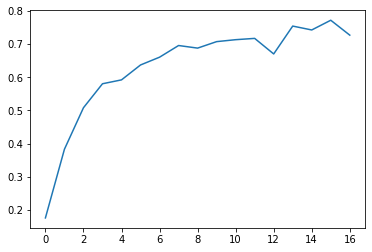

In [50]:
plt.plot(h['accuracy'])

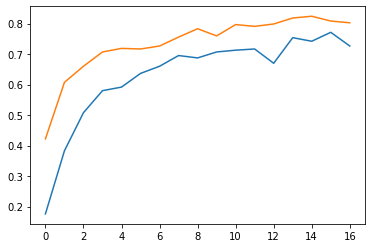

In [51]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.show()

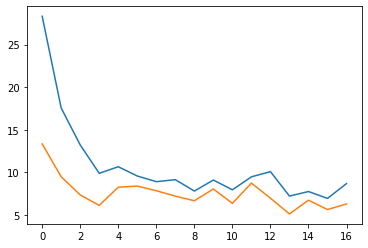

In [52]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.show()

In [67]:
ori_model.save("prediction.h5")

In [83]:
from keras.models import load_model
base_model = load_model("C:\\Users\\Welcome\\best_model.h5")

In [99]:
name = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [100]:
def prediction(path):
    img = load_img(path, target_size=(256,256))
    i = img_to_array(img)
    
    im = preprocess_input(i)
    img = np.expand_dims(im, axis = 0)
#     pred = base_model.predict(img)
    pred = np.argmax(base_model.predict(img))
    print(name[pred])

path = "C:\\Users\\Welcome\\dataset\\test\\AppleCedarRust1.jpg"
prediction(path)

1/1 [==============================] - 1s 541ms/step
Apple___Cedar_apple_rust
